# Support Vector Machine Classifiers for audio files , features extracted from MIDI    30 second data set analysis

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline

In [2]:
data_dir = './DataStreamFeatures/DataFrames/'

df_best_features = pd.read_csv(data_dir + 'BestMusicFeatures_30seconds.csv')

df_best_features.head()

,Range,PitchVariety,NumberOfCommonPitches,IntervalBetweenStrongestPitches,MostCommonPitchPrevalence,NoteDensity,AmountOfArpeggiation,MinimumNoteDuration,StepwiseMotion,IntervalBetweenStrongestPitchClasses,...,VariabilityOfNoteDuration,MelodicOctaves,PitchClassVariety,DistanceBetweenMostCommonMelodicIntervals,MostCommonPitchClass,MelodicTritones,RelativeStrengthOfTopPitchClasses,DirectionOfMotion,Composer_name,Composer_label
0,29.0,22.0,5.0,5.0,0.126263,6.439024,0.384615,0.125,0.538462,2.0,...,0.078750,0.015385,11.0,1.0,7.0,0.005128,0.906250,0.521212,Bach,0.0
1,24.0,20.0,2.0,7.0,0.229592,6.373984,0.463918,0.125,0.427835,5.0,...,0.082307,0.020619,11.0,2.0,2.0,0.005155,0.666667,0.541667,Bach,0.0
2,24.0,19.0,2.0,7.0,0.247475,6.439024,0.474490,0.125,0.433673,5.0,...,0.084916,0.025510,11.0,2.0,2.0,0.000000,0.684211,0.513889,Bach,0.0
3,24.0,20.0,2.0,7.0,0.242268,6.308943,0.484375,0.125,0.442708,5.0,...,0.082494,0.020833,11.0,2.0,2.0,0.005208,0.627119,0.503597,Bach,0.0
4,48.0,46.0,2.0,2.0,0.099631,15.875000,0.252066,0.125,0.634298,2.0,...,0.120471,0.037190,12.0,1.0,6.0,0.020661,0.941860,0.381148,Bach,0.0


In [3]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

240 samples with 22 features each <class 'numpy.ndarray'>


In [4]:
y = df_best_features['Composer_label'].to_numpy()

y.shape

(240,)

# Scale Features using Standard Scalar

# First Trial, take only two features, can then make cool Scatter plots

In [5]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

240 samples with 22 features each <class 'numpy.ndarray'>


In [6]:
print(X.shape)

X = X[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X.shape)

(240, 22)
(240, 2)


Test different kernals some statring parameters

In [7]:
linear = svm.SVC(kernel='linear', C=10, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=0.1, C=10, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=10, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=10, decision_function_shape='ovo').fit(X_train, y_train)

In [8]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .05
#create the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

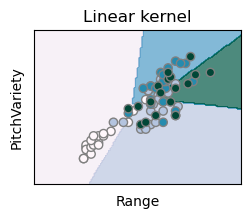

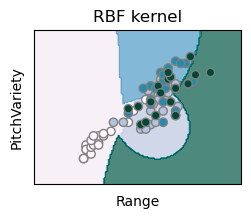

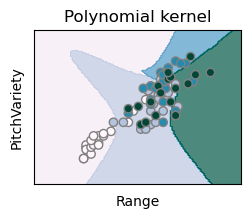

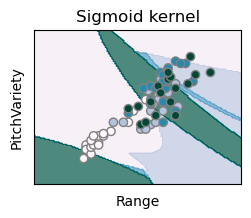

In [9]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X_scaled[::3, 0], X_scaled[::3, 1], c=y[::3], cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel(training_features_list[0])
    plt.ylabel(training_features_list[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [10]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Linear Kernel: 0.5277777777777778
Accuracy Polynomial Kernel: 0.5277777777777778
Accuracy Radial Basis Kernel: 0.5555555555555556
Accuracy Sigmoid Kernel: 0.25


# Try with Full list of Features, same parameters

In [11]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X_scaled.shape)

240 samples with 22 features each <class 'numpy.ndarray'>
(240, 22)


In [12]:
linear_all = svm.SVC(kernel='linear', C=10, decision_function_shape='ovo').fit(X_train, y_train)
rbf_all = svm.SVC(kernel='rbf', gamma=0.1, C=10, decision_function_shape='ovo').fit(X_train, y_train)
poly_all = svm.SVC(kernel='poly', degree=3, C=10, decision_function_shape='ovo').fit(X_train, y_train)
sig_all = svm.SVC(kernel='sigmoid', C=10, decision_function_shape='ovo').fit(X_train, y_train)

In [13]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin_all = linear_all.score(X_test, y_test)
accuracy_poly_all = poly_all.score(X_test, y_test)
accuracy_rbf_all = rbf_all.score(X_test, y_test)
accuracy_sig_all = sig_all.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin_all)
print('Accuracy Polynomial Kernel:', accuracy_poly_all)
print('Accuracy Radial Basis Kernel:', accuracy_rbf_all)
print('Accuracy Sigmoid Kernel:', accuracy_sig_all)

Accuracy Linear Kernel: 0.5833333333333334
Accuracy Polynomial Kernel: 0.6944444444444444
Accuracy Radial Basis Kernel: 0.75
Accuracy Sigmoid Kernel: 0.5277777777777778


# Grid Search RBF Kernels , which seem to work best

- based on grid search example in scikit learn documentation [Grid Search SV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html)

- First time I tried this, RBF was getting 0.3

- after first analysis, realized RBF does very well, but needs to gave gamma and C tuned well 

- gamma and C values above from C, gamma grid search done on larger data set of 15 second clips 

- will show linear here for comparison , to show RBF does seem to do best, once C and Gamma tuned 


- Gamma more important than C value , so going to search slices of gamma , at fixed C 

In [14]:
## will use cross validation for the grid search... 

X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))


#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#Scale X and take all X and y

X_scaled = scaler.fit_transform(X)

print(X.shape)

240 samples with 22 features each <class 'numpy.ndarray'>
(240, 22)


In [15]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1,1e0,3e0],
                     'C': [100]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [100],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [16]:
results_df_C1 = pd.DataFrame(search.cv_results_)

results_df_C1['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df_C1['params'].values]

results_df_C1['C']=[p['C'] for p in results_df_C1['params'].values]

results_df = results_df_C1

#results_df = pd.concat([results_df,results_df_C1])

<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

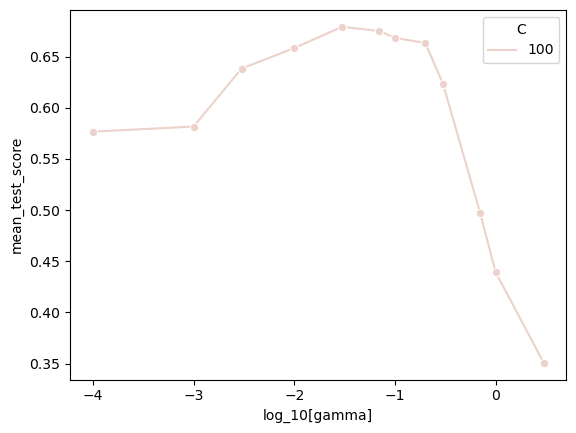

In [17]:
results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')

In [18]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1,1e0,3e0],
                     'C': [1000]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search_C2 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search_C2.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [1000],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [19]:
results_df_C2 = pd.DataFrame(search_C2.cv_results_)

results_df_C2['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df_C2['params'].values]

results_df_C2['C']=[p['C'] for p in results_df_C2['params'].values]

results_df = pd.concat([results_df,results_df_C2])

<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

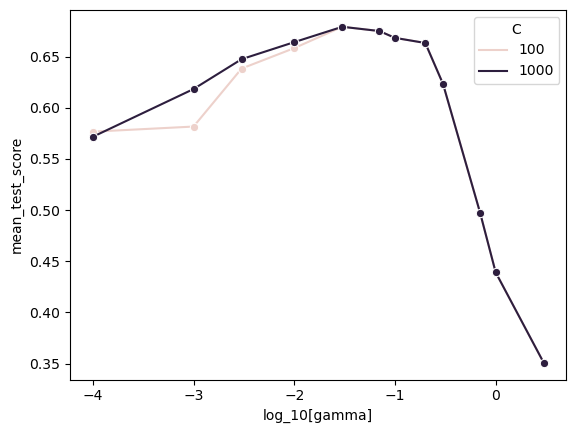

In [20]:
results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')

In [21]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1],
                     'C': [1e4]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search_C3 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search_C3.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [10000.0],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7],
                          'kernel': ['rbf']}])

In [22]:
results_df_C3 = pd.DataFrame(search_C3.cv_results_)

results_df_C3['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df_C3['params'].values]

results_df_C3['C']=[p['C'] for p in results_df_C3['params'].values]

results_df = pd.concat([results_df,results_df_C3])

<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

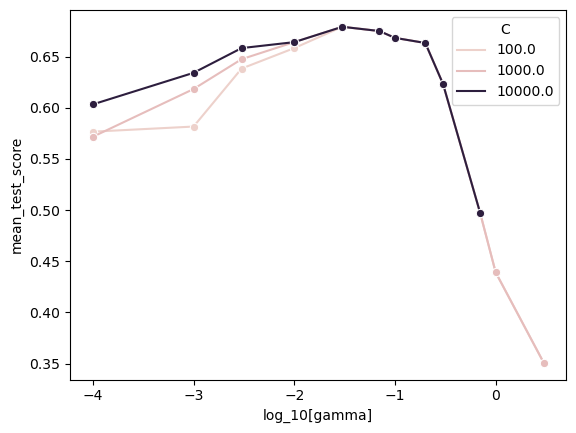

In [23]:
results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')

In [24]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1],
                     'C': [1e6]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search_C4 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search_C4.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [1000000.0],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7],
                          'kernel': ['rbf']}])

In [25]:
results_df_C4 = pd.DataFrame(search_C4.cv_results_)

results_df_C4['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df_C4['params'].values]

results_df_C4['C']=[p['C'] for p in results_df_C4['params'].values]

results_df = pd.concat([results_df,results_df_C4])

<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

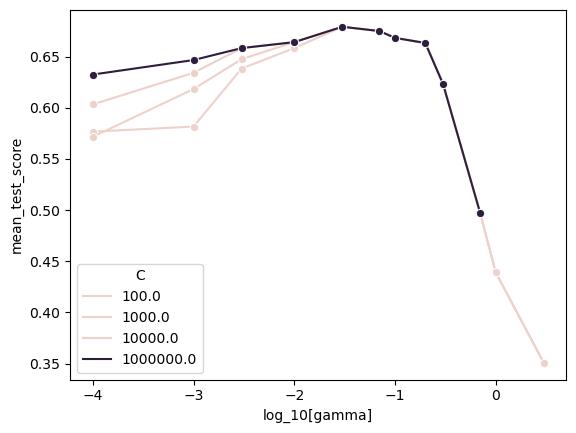

In [26]:
results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')

In [27]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1],
                     'C': [1e9]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search_C5 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search_C5.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [1000000000.0],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7],
                          'kernel': ['rbf']}])

In [28]:
results_df_C5 = pd.DataFrame(search_C5.cv_results_)

results_df_C5['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df_C5['params'].values]

results_df_C5['C']=[p['C'] for p in results_df_C5['params'].values]

results_df = pd.concat([results_df,results_df_C5])

<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

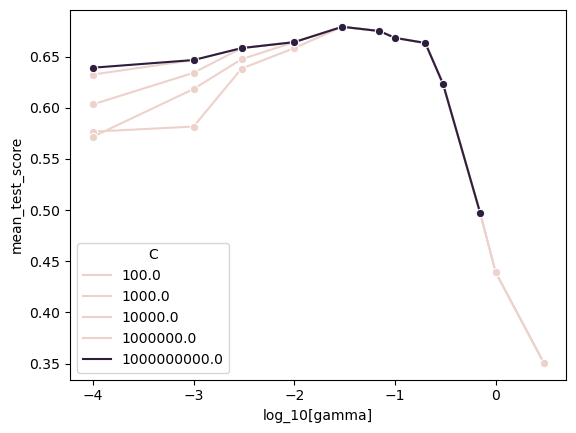

In [29]:
results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')

In [30]:
# View the accuracy score
print('Best score for training data:', search.best_score_,"\n") 

# View the best parameters for the model found using grid search

Best_C = search_C2.best_estimator_.C

Best_GAMMA = search_C2.best_estimator_.gamma

print('Best C:',Best_C,"\n") 
print('Best Kernel:',search_C2.best_estimator_.kernel,"\n")
print('Best Gamma:',Best_GAMMA,"\n")

final_model = search_C2.best_estimator_

Best score for training data: 0.6791666666666667 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.03 



In [31]:
# TO PREDICT 

# need to apply standardScalar to the test data set with 22 features... then call predict method on model

#Y_pred = final_model.predict(X_test_scaled)

# Try model with grid search parameters and top two features ? 


In [32]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

240 samples with 22 features each <class 'numpy.ndarray'>


In [33]:
print(X.shape)

X = X[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X.shape)

(240, 22)
(240, 2)


In [34]:
rbf_two_features = svm.SVC(kernel='rbf', gamma=Best_GAMMA, C=Best_C, decision_function_shape='ovo').fit(X_train, y_train)

In [35]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .05
#create the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = [f'RBF g = {Best_GAMMA} C = {Best_C}']

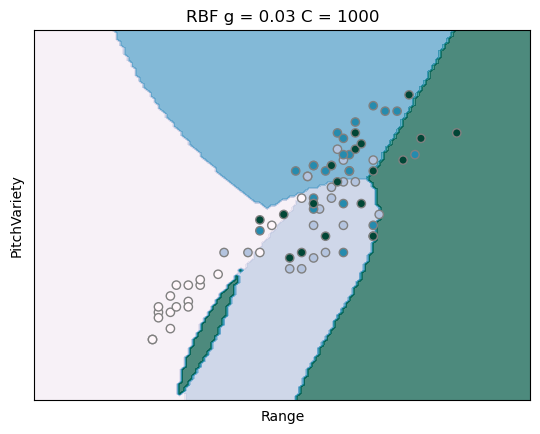

In [36]:
for i, clf in enumerate((rbf_two_features,)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(1, 1, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X_scaled[::3, 0], X_scaled[::3, 1], c=y[::3], cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel(training_features_list[0])
    plt.ylabel(training_features_list[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [37]:
# retrieve the accuracy and print it for all 4 kernel functions

accuracy_rbf_two_features_test = rbf_two_features.score(X_test, y_test)

accuracy_rbf_two_features_train = rbf_two_features.score(X_train, y_train)

print('TEST Accuracy Radial Basis Kernel two features:', accuracy_rbf_two_features_test)

print('TRAIN Accuracy Radial Basis Kernel two features:', accuracy_rbf_two_features_train)


TEST Accuracy Radial Basis Kernel two features: 0.5555555555555556
TRAIN Accuracy Radial Basis Kernel two features: 0.5637254901960784


In [38]:
# if time, search choice of C , see how it effects this, do we want more regularization ? 

# Learning Curves...   Want to decide if it's worth it to collect larger data set of 30 second clips


* 30 seconds clips best model had avg accuracy 0.67 

* 15 seconds clips with twice the data had accur 0.69 

* not sure if I would get much better performance going to larger data set of 30 second clips ? 

In [39]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

240 samples with 22 features each <class 'numpy.ndarray'>


In [40]:
from sklearn.model_selection import learning_curve

svm_best_params = svm.SVC(kernel='rbf', gamma=Best_GAMMA, C=0.01*Best_C, decision_function_shape='ovo')

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

X = scaler.fit_transform(X)

train_size_abs, train_scores, test_scores = learning_curve(
                                                            svm_best_params, X, y, cv=cv,train_sizes=np.linspace(0.3,1,20)
)


size_list = []

cv_train_list = []

cv_test_list = []

for train_size, cv_train_scores, cv_test_scores in zip(
    train_size_abs, train_scores, test_scores
):
    size_list.append(train_size)
    cv_train_list.append(cv_train_scores.mean())
    cv_test_list.append(cv_test_scores.mean())
    
    
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.5f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.5f}")

57 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.43167
64 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.45667
71 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.46250
78 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.46500
85 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.46917
92 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.47333
100 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.48000
107 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.51000
114 samples were used to train the model
The average train accuracy is 1.00000

<AxesSubplot: >

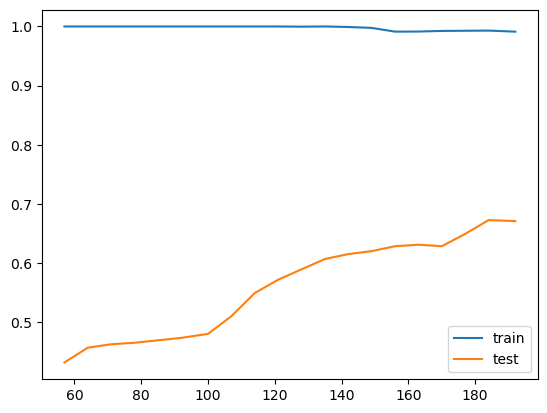

In [42]:
learing_results_df = pd.DataFrame([])


learning_df = pd.DataFrame(list(zip(cv_train_list, cv_test_list)),
               columns =['train','test'],index=size_list)

learning_df.plot()

In [44]:
final_model.predict_proba(X_test)

AttributeError: predict_proba is not available when  probability=False

In [45]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

240 samples with 22 features each <class 'numpy.ndarray'>
